In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')

clean_data_dir = Path('../data/clean')

clean_datasets = {
    'Applications to Turkey': pd.read_csv(clean_data_dir / 'applications_to_turkey_clean.csv'),
    'Decisions from Turkey': pd.read_csv(clean_data_dir / 'decisions_from_turkey_clean.csv'),
    'Applications from Turkey': pd.read_csv(clean_data_dir / 'applications_from_turkey_clean.csv'),
    'Decisions from other countries': pd.read_csv(clean_data_dir / 'decisions_from_other_countries_clean.csv'),
}


def clean_country_names(df_or_series):
    """Shorten long country names for better visualization"""
    country_name_map = {
        'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
        'Iran (Islamic Republic of)': 'Iran',
        'Syrian Arab Republic': 'Syria',
        'Netherlands (Kingdom of the)': 'Netherlands',
    }
    
    result = df_or_series.copy()
    result.index = result.index.map(lambda x: country_name_map.get(x, x))
    
    if isinstance(result, pd.DataFrame):
        result.columns = result.columns.map(lambda x: country_name_map.get(x, x))
    
    return result


print('Data loaded successfully!')

for name, df in clean_datasets.items():
    print(f"{name}: {len(df)} rows")

Data loaded successfully!
Applications to Turkey: 938 rows
Decisions from Turkey: 901 rows
Applications from Turkey: 1779 rows
Decisions from other countries: 1686 rows


In [2]:
print('Time range for each dataset:')
print()
for name, df in clean_datasets.items():
    print(f"{name}: {df['Year'].min()} - {df['Year'].max()}")

Time range for each dataset:

Applications to Turkey: 2000 - 2025
Decisions from Turkey: 2000 - 2023
Applications from Turkey: 2000 - 2025
Decisions from other countries: 2000 - 2025


# Asylum Applications Analysis

## Data Limitations

Before diving into the analysis, it's important to note some limitations in this dataset:

- **Syrian refugees**: This dataset captures formal asylum applications only. Turkey's ~3.6 million Syrian refugees are under "Temporary Protection" status and not reflected in these numbers.
- **Missing recent data**: Some countries (Syria, Somalia) have incomplete data post-2018, likely due to reporting changes or policy shifts.
- **Recognition vs. immigration**: Recognition rates reflect formal asylum/refugee decisions only, not other immigration pathways (work visas, student visas, family reunification, etc.).

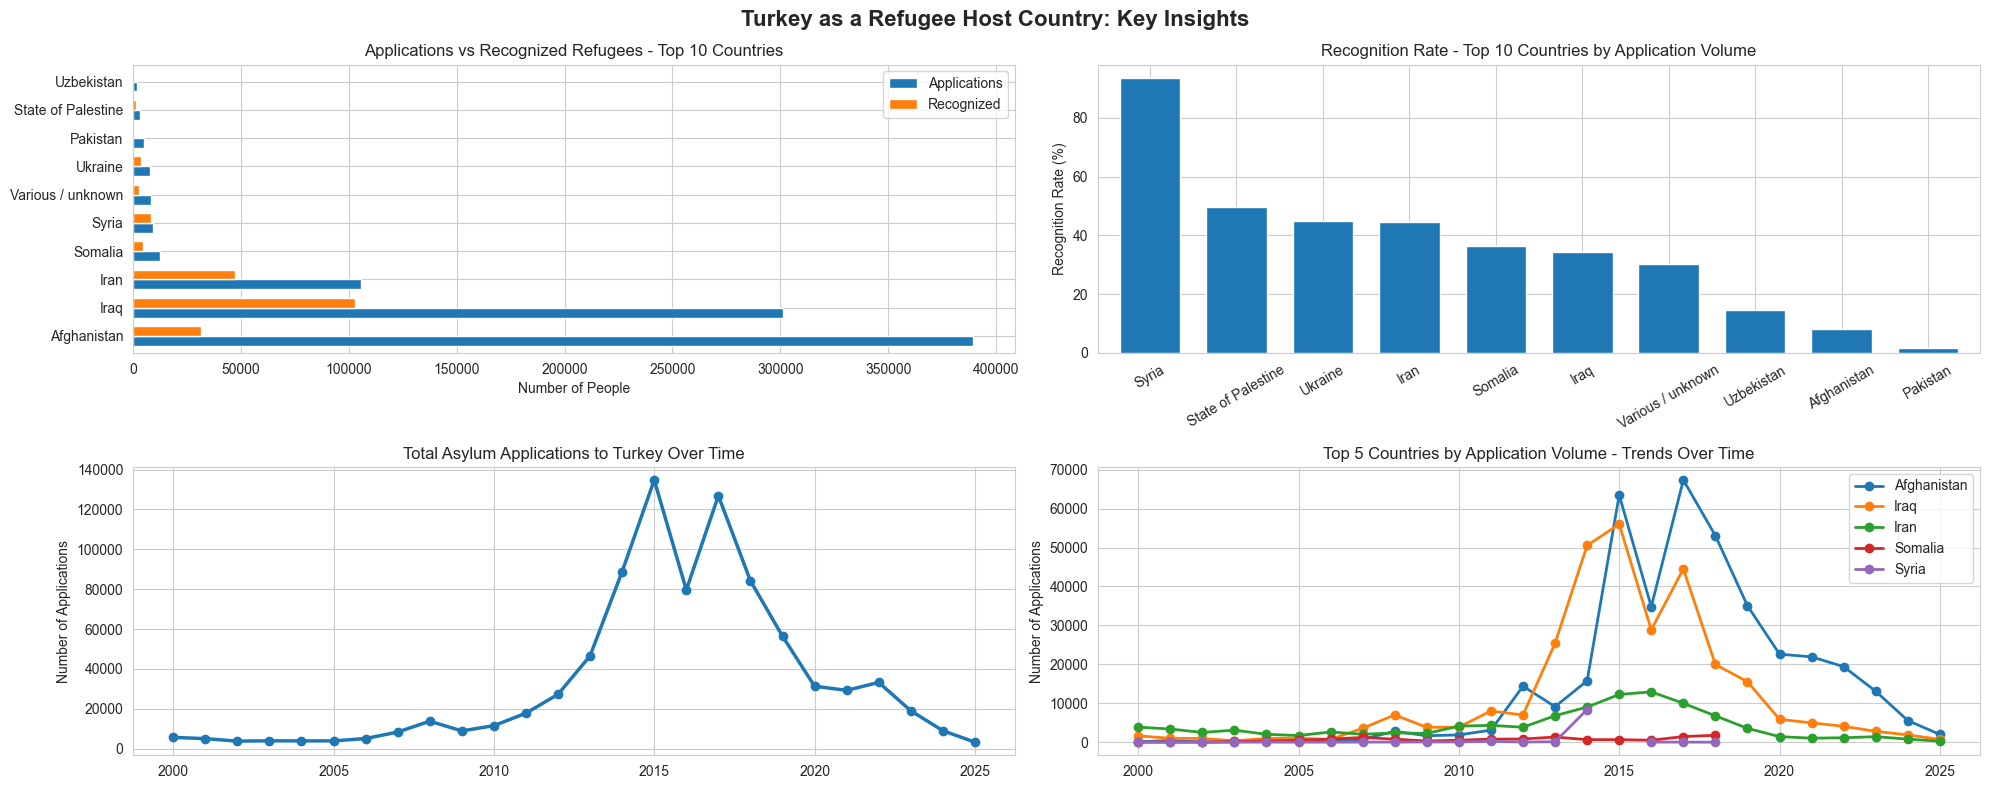

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

apps_to_turkey_by_country = clean_datasets['Applications to Turkey'].groupby('Country of Origin Name')['Number of Applications'].sum()
recognized_to_turkey_by_country = clean_datasets['Decisions from Turkey'].groupby('Country of Origin Name')['Recognized'].sum()

comparison_to_turkey = pd.DataFrame({
    'Applications': apps_to_turkey_by_country,
    'Recognized': recognized_to_turkey_by_country
}).fillna(0)

top10_to_turkey = comparison_to_turkey.loc[apps_to_turkey_by_country.sort_values(ascending=False).head(10).index]
top10_to_turkey_display = clean_country_names(top10_to_turkey)
top10_to_turkey_display.plot(
    kind='barh',
    width=0.7,
    xlabel='Number of People',
    ylabel='',
    title='Applications vs Recognized Refugees - Top 10 Countries',
    legend=['Applications', 'Recognized'],
    ax=axes[0, 0]
    )


comparison_to_turkey['Recognition percent'] = (recognized_to_turkey_by_country / apps_to_turkey_by_country) * 100
recognition_rate_to_turkey = comparison_to_turkey.loc[apps_to_turkey_by_country.sort_values(ascending=False).head(10).index]['Recognition percent'].sort_values(ascending=False)
recognition_rate_to_turkey_display = clean_country_names(recognition_rate_to_turkey)
recognition_rate_to_turkey_display.plot(
    kind='bar',
    width=0.7,
    xlabel='',
    ylabel='Recognition Rate (%)',
    title='Recognition Rate - Top 10 Countries by Application Volume',
    rot=30,
    ax=axes[0, 1]
    )


apps_to_turkey_per_year = clean_datasets['Applications to Turkey'].groupby('Year')['Number of Applications'].sum()
apps_to_turkey_per_year.plot(
    kind='line', 
    linewidth=2.5, 
    marker='o',
    xlabel='',
    ylabel='Number of Applications', 
    title='Total Asylum Applications to Turkey Over Time',
    ax=axes[1, 0],
    grid=True
)


apps_to_turkey_by_country_year = clean_datasets['Applications to Turkey'].groupby(['Country of Origin Name', 'Year']).agg({'Number of Applications': 'sum'})
top5_to_turkey_over_time = apps_to_turkey_by_country_year.loc[apps_to_turkey_by_country.sort_values(ascending=False).head(5).index]
top5_to_turkey_pivoted = top5_to_turkey_over_time['Number of Applications'].unstack(level=0)
top5_to_turkey_pivoted_display = clean_country_names(top5_to_turkey_pivoted)
top5_to_turkey_pivoted_display.plot(
    kind='line',
    linewidth=2,
    marker='o',
    xlabel='',
    ylabel='Number of Applications',
    title='Top 5 Countries by Application Volume - Trends Over Time',
    ax=axes[1, 1],
    grid=True
).legend(title='', loc='upper right')

fig.suptitle('Turkey as a Refugee Host Country: Key Insights', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

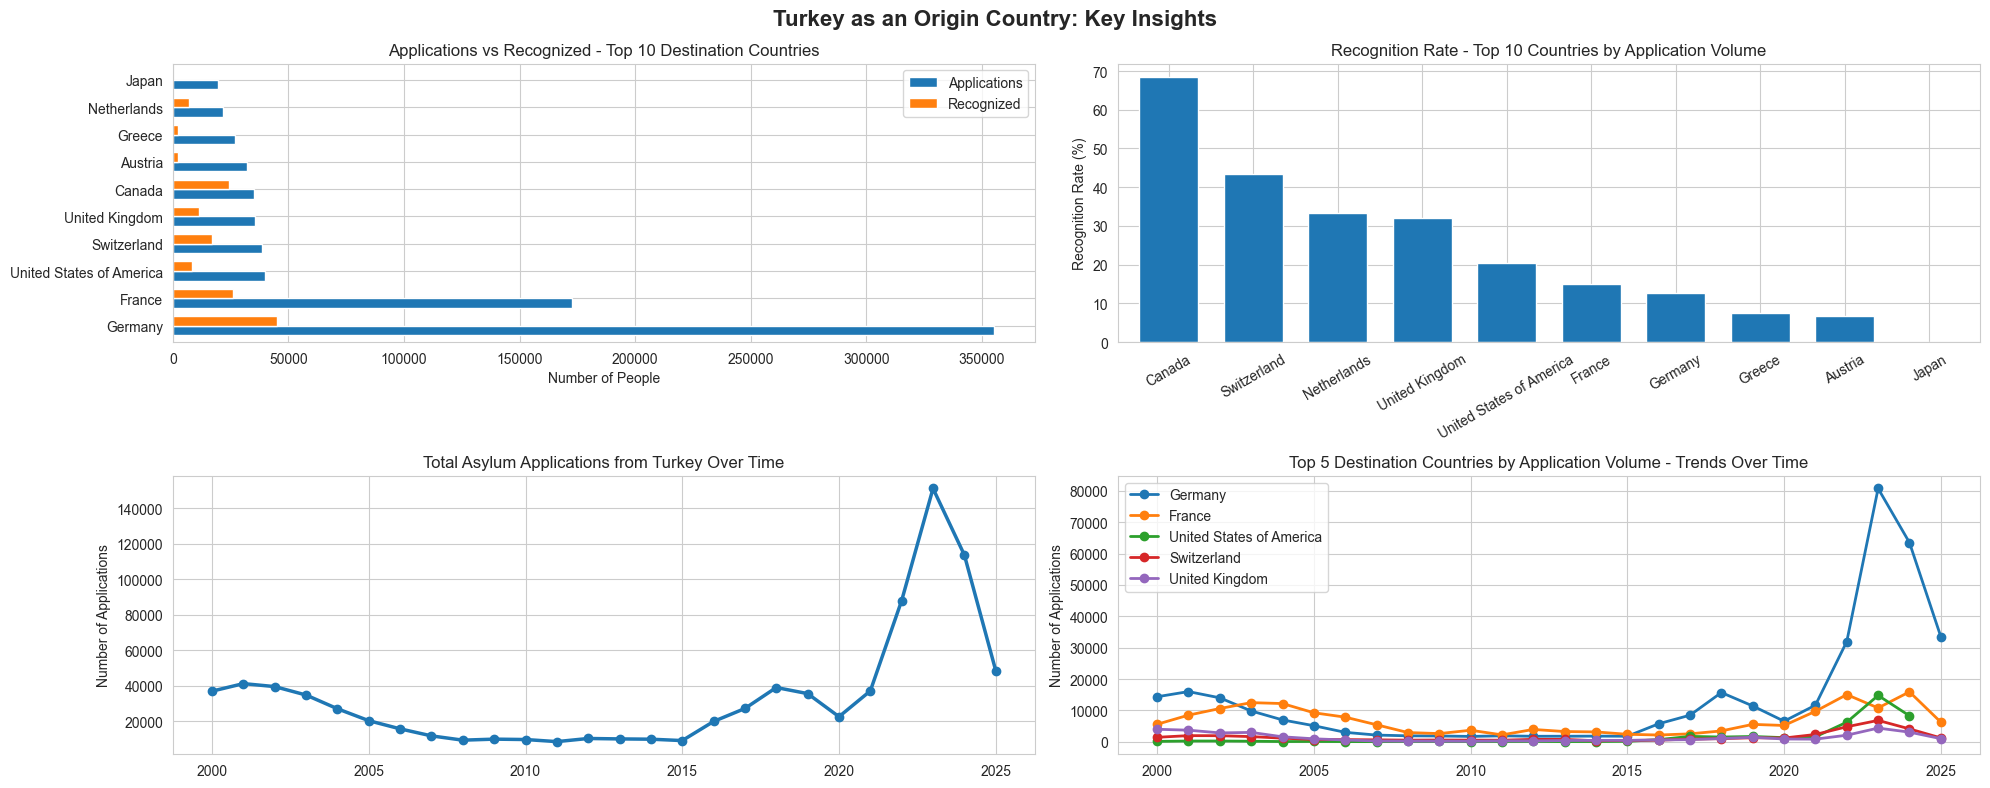

In [4]:
fig2, axes2 = plt.subplots(2, 2, figsize=(20, 8))

apps_from_turkey_by_country = clean_datasets['Applications from Turkey'].groupby('Country of Asylum Name')['Number of Applications'].sum()
recognized_from_turkey_by_country = clean_datasets['Decisions from other countries'].groupby('Country of Asylum Name')['Recognized'].sum()

comparison_from_turkey = pd.DataFrame({
    'Applications': apps_from_turkey_by_country,
    'Recognized': recognized_from_turkey_by_country
}).fillna(0)

top10_from_turkey = comparison_from_turkey.loc[apps_from_turkey_by_country.sort_values(ascending=False).head(10).index]
top10_from_turkey_display = clean_country_names(top10_from_turkey)
top10_from_turkey_display.plot(
    kind='barh',
    width=0.7,
    xlabel='Number of People',
    ylabel='',
    title='Applications vs Recognized - Top 10 Destination Countries',
    legend=['Applications', 'Recognized'],
    ax=axes2[0, 0]
    )


comparison_from_turkey['Recognition percent'] = (recognized_from_turkey_by_country / apps_from_turkey_by_country) * 100
recognition_rate_from_turkey = comparison_from_turkey.loc[apps_from_turkey_by_country.sort_values(ascending=False).head(10).index]['Recognition percent'].sort_values(ascending=False)
recognition_rate_from_turkey_display = clean_country_names(recognition_rate_from_turkey)
recognition_rate_from_turkey_display.plot(
    kind='bar',
    width=0.7,
    xlabel='',
    ylabel='Recognition Rate (%)',
    title='Recognition Rate - Top 10 Countries by Application Volume',
    rot=30,
    ax=axes2[0, 1]
    )


apps_from_turkey_per_year = clean_datasets['Applications from Turkey'].groupby('Year')['Number of Applications'].sum()
apps_from_turkey_per_year.plot(
    kind='line', 
    linewidth=2.5, 
    marker='o',
    xlabel='',
    ylabel='Number of Applications', 
    title='Total Asylum Applications from Turkey Over Time',
    ax=axes2[1, 0],
    grid=True
)


apps_from_turkey_by_country_year = clean_datasets['Applications from Turkey'].groupby(['Country of Asylum Name', 'Year']).agg({'Number of Applications': 'sum'})
top5_from_turkey_over_time = apps_from_turkey_by_country_year.loc[apps_from_turkey_by_country.sort_values(ascending=False).head(5).index]
top5_from_turkey_pivoted = top5_from_turkey_over_time['Number of Applications'].unstack(level=0)
top5_from_turkey_pivoted_display = clean_country_names(top5_from_turkey_pivoted)
top5_from_turkey_pivoted_display.plot(
    kind='line',
    linewidth=2,
    marker='o',
    xlabel='',
    ylabel='Number of Applications',
    title='Top 5 Destination Countries by Application Volume - Trends Over Time',
    ax=axes2[1, 1],
    grid=True
).legend(title='', loc='upper left')

fig2.suptitle('Turkey as an Origin Country: Key Insights', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

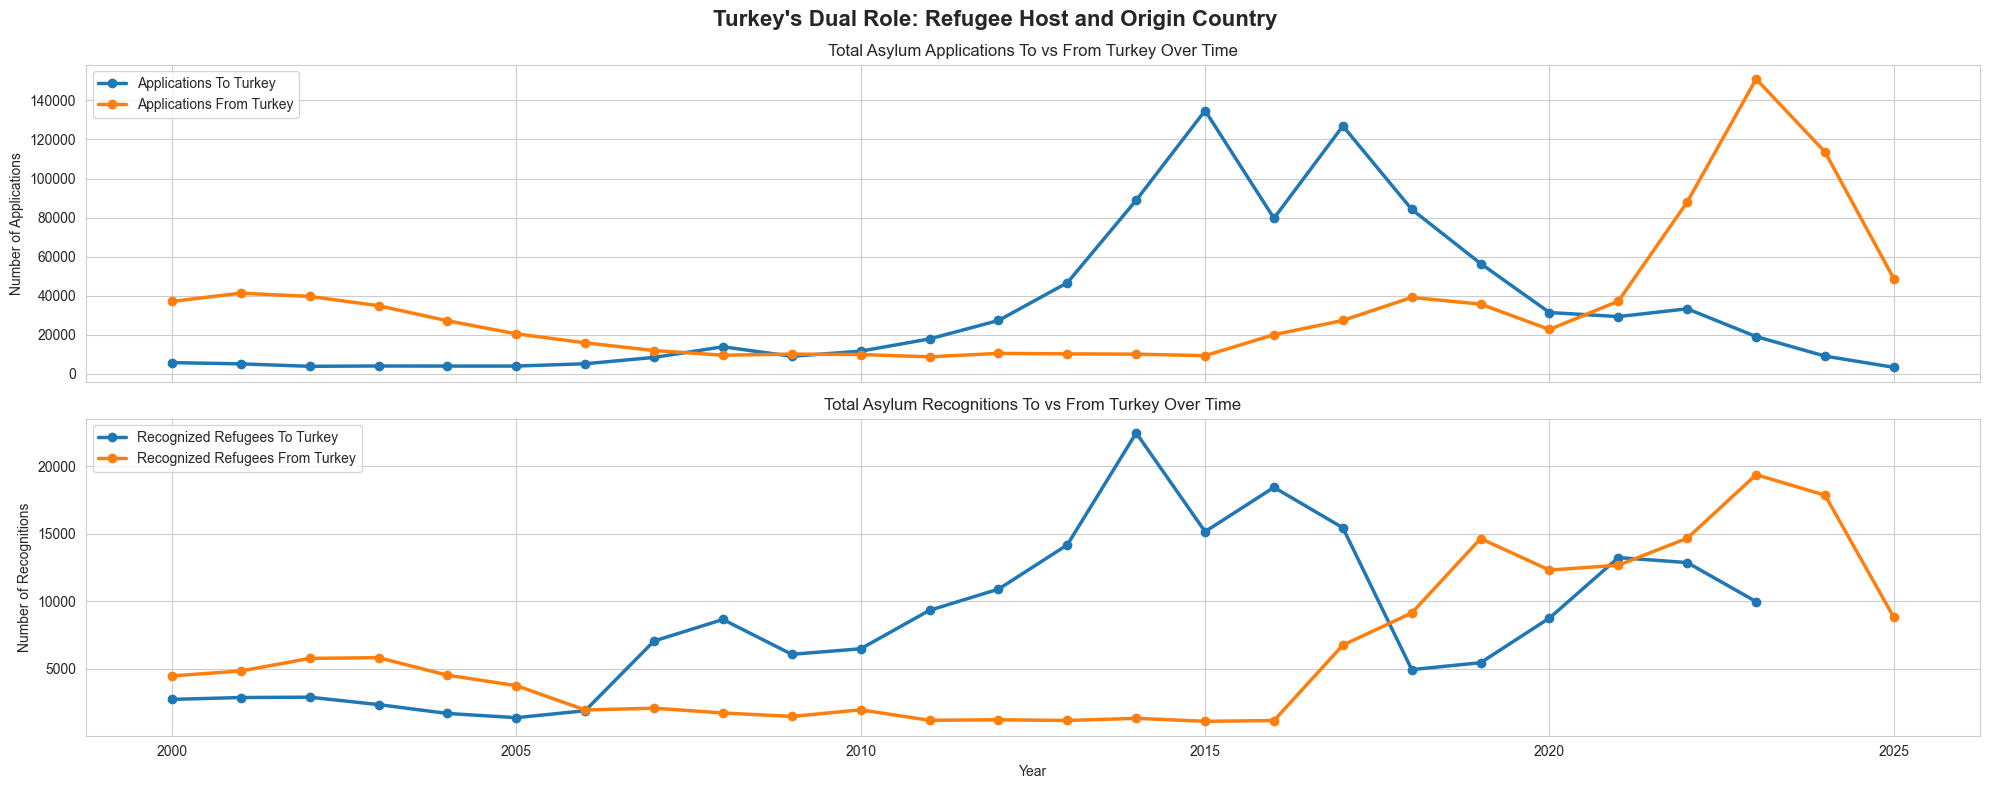

In [5]:
fig3, axes3 = plt.subplots(2, 1, sharex=True, figsize=(20, 8))

comparison_to_vs_from_turkey_applications = pd.DataFrame({
    'Applications To Turkey': apps_to_turkey_per_year,
    'Applications From Turkey': apps_from_turkey_per_year
})

comparison_to_vs_from_turkey_applications.plot(
    kind='line',
    linewidth=2.5,
    marker='o',
    ylabel='Number of Applications',
    title='Total Asylum Applications To vs From Turkey Over Time',
    ax=axes3[0],
    grid=True
)


recognitions_to_turkey_per_year = clean_datasets['Decisions from Turkey'].groupby('Year')['Recognized'].sum()
recognitions_from_turkey_per_year = clean_datasets['Decisions from other countries'].groupby('Year')['Recognized'].sum()

comparison_to_vs_from_turkey_recognitions = pd.DataFrame({
    'Recognized Refugees To Turkey': recognitions_to_turkey_per_year,
    'Recognized Refugees From Turkey': recognitions_from_turkey_per_year
})

comparison_to_vs_from_turkey_recognitions.plot(
    kind='line',
    linewidth=2.5,
    marker='o',
    ylabel='Number of Recognitions',
    title='Total Asylum Recognitions To vs From Turkey Over Time',
    ax=axes3[1],
    grid=True
).legend(loc='upper left')

fig3.suptitle('Turkey\'s Dual Role: Refugee Host and Origin Country', 
              fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

## Key Observations

### The Data Tells Two Stories:

**1. Turkey as a Major Refugee Host (2011-2018)**
- Massive spike in applications during Syrian crisis (peak ~130,000 in 2015)
- Turkey played a critical role as a buffer zone for Europe
- Recognition numbers peaked around 2014-2016

**2. Turkey as an Origin Country (2016-present)**
- Initial increase in Turkish asylum applications abroad post-2016 (failed coup attempt)
- Dramatic surge in recent years (2021-2023), likely driven by economic crisis, political repression, deteriorating rule of law, and mass arrests
- Applications peaked at ~150,000 in 2023, surpassing incoming refugee applications starting in 2021

**Notable trend:** Turkish asylum seekers recognized abroad surpassed refugees Turkey recognized in two distinct periods: 2000-2006 (early period) and 2018-present (recent period). This reflects both Turkey's dual role and significant data completeness issues in recent "TO Turkey" reporting.

### Data Completeness Issues:

The declining trend in "Applications/Recognitions TO Turkey" after 2018 likely reflects **data reporting gaps** rather than reality:
- Turkey shifted many refugees (especially Syrians) to "Temporary Protection" status outside formal asylum processes
- This dataset only captures formal UNHCR-reported asylum applications
- Turkey actually hosts ~3.6 million Syrian refugees, not reflected in these numbers

**Implication:** The "FROM Turkey" data (Turkish asylum seekers abroad) is more complete and reliable for recent years, while "TO Turkey" data significantly underrepresents the true scale of Turkey's refugee population. Comparisons after 2018 should be interpreted with caution.